# Introduction

This is our last workshop, in this workshop, we'll focus on a popular and powerful dimensionality reduction method called Principle Component Analysis (PCA), followed by a brief introduction about neural networks, taking multi-layer perceptron (MLP) as an instance.

# Principle Component Analysis (PCA)

## 1. Curse of dimensionality

The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience.

Filling a lines between $ 0 $ and $ 1 $ where maximum separation between adjacent points is $ 0.1 $, then we need at least $ 11 $ points. As dimension goes up to 2, which is a plane, we need $ 11^2 $ points. In machine learning we usually have datasets with tens of features, we need $ 11^n $ points to ensure maximum separation is still $ 0.1 $.

However, most datasets only have thousands of data points. If you can imagine, these data points in high-dimensional spaces are far away. When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. In order to obtain a reliable result, the amount of data needed often grows exponentially with the dimensionality. Also, organizing and searching data often relies on detecting areas where objects form groups with similar properties, but in high-dimensional data, all objects appear to be sparse and dissimilar in many ways, which prevents common data organization strategies from being efficient.

![curse of dimensionality](img/Curse-of-Dimensionality.png)

## 2. Reduction of dimensionality

PCA is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.

The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified.

Consider the following example:

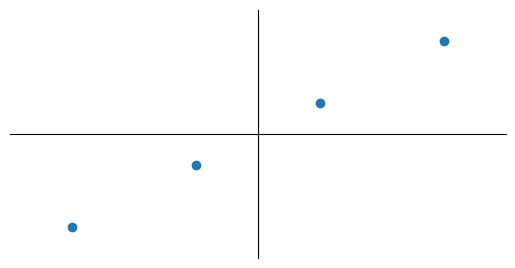

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = [-3, -1, 1, 3]
y = [-1.5, -0.5, 0.5, 1.5]
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.scatter(x, y)

ax = plt.gca()
ax.set_aspect(1)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.spines["bottom"].set_position(("data", 0))
ax.yaxis.set_ticks_position("left")
ax.spines["left"].set_position(("data", 0))

ax.set_xticks([])
ax.set_yticks([])

plt.show()

Obviously these points can make up a straight line. If we rotate the axes to make x-axis lies on these points, then all points have a zero values of y, and we can remove that axis to reduce dimensionality.

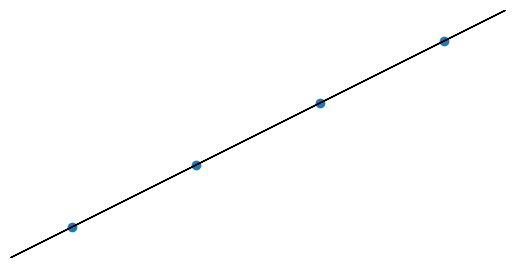

In [2]:
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.scatter(x, y)
plt.arrow(-4, -2, 8, 4)

ax = plt.gca()
ax.set_aspect(1)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")
plt.axis("off")
plt.show()

The core idea behind PCA is to project data onto a new set of orthogonal axes such that the first axis (first principal component) captures the most variance, the second captures the next most variance, and so on. This allows us to remove redundant information, reduce computational complexity, and improve visualization while minimizing the loss of important information.

**Principal Components**:
Principal components are the new axes formed by eigenvectors. They are ranked based on their eigenvalues, with the first principal component capturing the most variance.
Mathematically, the first principal component is the eigenvector corresponding to the largest eigenvalue.

![principle axes](img/axes.png)

**Principal Axes**: the first direction that accounts for as much of the variance as possible (à i.e. variance is maximum); then the direction orthogonal to the first for which the variance is maximum, and so on…

## 3. Assumptions of PCA

- **Linearity**: PCA assumes that the data can be well represented by a linear combination of features, meaning nonlinear relationships are not captured.

- **Large Variance** = Important Information: It assumes that principal components (PCs) capturing the most variance also represent the most meaningful patterns in the data.

- **Mean-Centered Data**: PCA assumes the data is centered (zero mean) to ensure that the first principal component captures the direction of maximum variance correctly.

- **Independent Principal Components**: The resulting principal components are uncorrelated (orthogonal), meaning each component captures unique variance in the data.

- **Gaussian Distribution (Optional)**: While not a strict requirement, PCA works best when features follow a normal distribution since variance is a good measure of information in such cases.

- **Equal Importance of Feature Scaling**: PCA assumes that features are on a comparable scale. If not standardized, features with larger numerical ranges dominate variance.

- **No Significant Outliers**: PCA is sensitive to outliers because it is based on variance; extreme values can distort the principal components.

These assumptions impact the effectiveness of PCA, and violating them can lead to misleading results.

## 4. Mathematical derivation

PCA is finding axes where main axis towards maximum variance and has lowest average squared perpendicular distance from data points to the main axis.

For a dataset $ D $ of normally distributed x-y pair, we can apply two linear transformations $ S $ (scaling) and $ R $ (rotation), to make it looks like a normalised data set $ D' $ we usually have, where

$$
    D =
        \begin{bmatrix}
            x_1 & x_2 & \cdots & x_n \\
            y_1 & y_2 & \cdots & y_n
        \end{bmatrix} \qquad

    S = \begin{bmatrix}
            a & 0 \\
            0 & b
        \end{bmatrix} \qquad

    R = \begin{bmatrix}
            \cos θ & -\sin θ \\
            \sin θ & \cos θ
        \end{bmatrix} \qquad
$$

$$
    D' = RSD \tag{1}
$$

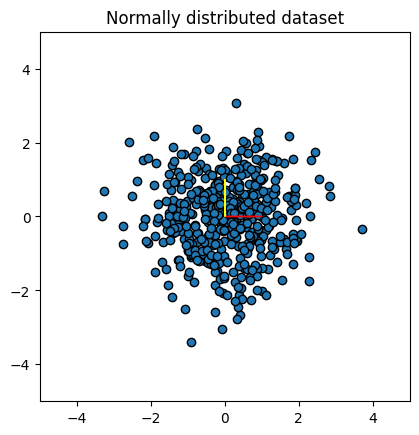

In [3]:
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect(1)
plt.scatter(x, y, edgecolors="black")
plt.arrow(0, 0, 1, 0, color="red")
plt.arrow(0, 0, 0, 1, color="yellow")
plt.title("Normally distributed dataset")
plt.show()

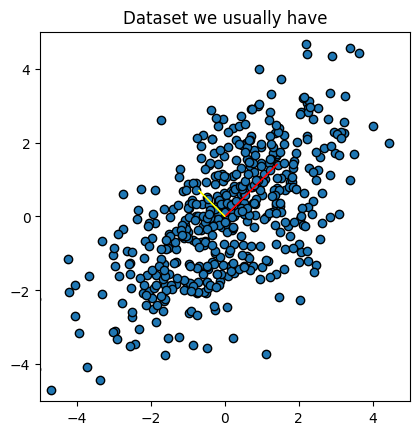

[[2.65493619 1.70209071]
 [1.70209071 2.77764981]]


In [4]:
D = np.column_stack([x, y]).T
S = np.array([[2, 0], [0, 1]])
ANGLE = math.radians(45)
R = np.array([[math.cos(ANGLE), -math.sin(ANGLE)], [math.sin(ANGLE), math.cos(ANGLE)]])
D2 = R @ S @ D

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect(1)
plt.scatter(D2[0], D2[1], edgecolors="black")
plt.arrow(0, 0, math.cos(ANGLE) * 2, math.sin(ANGLE) * 2, color="red")
plt.arrow(0, 0, -math.sin(ANGLE), math.cos(ANGLE), color="yellow")
plt.title("Dataset we usually have")
plt.show()

print(np.cov(D2[0], D2[1]))

When we transform white data $ D $ to dataset we have $ D' $, we can say the direction of stretching is the axis where variance is largest, and $ R $ rotate that axis by a specific angle. Our goal is to find $ R $ based on our dataset, so we can determine axes for PCA.

$$
    D' = RSD \tag{1}
$$
$$
    D = S^{-1}R^{-1}D' \tag{2}
$$

where

$$
    S^{-1} = \begin{bmatrix}
            1/a & 0 \\
            0 & 1/b
        \end{bmatrix} \qquad

    R^{-1} = \begin{bmatrix}
            \cos -θ & -\sin -θ \\
            \sin -θ & \cos -θ
        \end{bmatrix}
        = \begin{bmatrix}
            \cos θ & \sin θ \\
            -\sin θ & \cos θ
        \end{bmatrix} = R^{\rm T}
$$

Then how can we find $ R $?. Well, the eigenvector matrix of covarience matrix is $ R $.

This is the definition of covariance:

$$
    cov(x, y) = \frac {\sum^n_{i=1} (x_i - \overline{x}) (y_i - \overline{y})} {n - 1} \tag{3}
$$

Covariance shows how two variables change. It's positive if they one increases and the other one increases, or both decreases, and the magnitude shows extent of the second variable responds on first one's change.

$$
    x \uparrow \small\bigwedge y \uparrow \iff cov(x, y) > 0 \tag{4}
$$

When both arguments to covariance is same, then it's equal to variance (as our data is normalised, mean is equal to zero).

$$
    cov(x, x) = \frac {\sum^n_{i=1} (x_i - \overline{x})^2} {n - 1} = \frac {\sum^n_{i=1} x_i^2} {n - 1} \tag{5}
$$

And covariance matrix is defined as

$$
    C = \begin{bmatrix}
            cov(x, x) & cov(x, y) \\
            cov(x, y) & cov(y, y)
        \end{bmatrix} \tag{6}
$$

For white data, variance of both variables is $ 1 $, and $ cov(x, y) = 0 $ because x and y is independent.

$$
    C_D = \begin{bmatrix}
            1 & 0 \\
            0 & 1
        \end{bmatrix} = I \tag{7}
$$

Substitute definition of covariance into covariance matrix:

$$
    \begin{align*}
        C &= \begin{bmatrix}
                \frac {\sum^n_{i=1} x_i^2} {n - 1} & \frac {\sum^n_{i=1} x_i y_i} {n - 1} \\
                \frac {\sum^n_{i=1} x_i y_i} {n - 1} & \frac {\sum^n_{i=1} y_i^2} {n - 1}
            \end{bmatrix} \\
        &= \frac {1}{n - 1}
            \begin{bmatrix}
                \sum^n_{i=1} x_i^2 & \sum^n_{i=1} x_i y_i \\
                \sum^n_{i=1} x_i y_i & \sum^n_{i=1} y_i^2
            \end{bmatrix} \\
        &= \frac {1}{n - 1}
            \begin{bmatrix}
                x_1 & x_2 & \cdots & x_n \\
                y_1 & y_2 & \cdots & y_n
            \end{bmatrix}
            \begin{bmatrix}
                x_1 & y_1 \\
                x_2 & y_2 \\
                \vdots & \vdots \\
                x_n & y_n
            \end{bmatrix} \\
        &= \frac {1}{n - 1} D D^T \tag{8}
    \end{align*}
$$

Substitute definition of $ D' $:

$$
    \begin{align*}
        D' &= RSD \tag{1} \\
        C_{D'} &= \frac {1}{n - 1} D' D'^T \tag{8} \\
            &= \frac {1}{n - 1} RSD (RSD)^T \\
            &= \frac {1}{n - 1} RSDD^{\rm T}S^{\rm T}R^{\rm T} \\
            &= RS \left( \frac {1}{n - 1} DD^{\rm T} \right) S^{\rm T}R^{\rm T} \\
            &= RS C_D S^{\rm T}R^{\rm T} \\
            &= RSS^{\rm T}R^{\rm T} \\
            &= RSSR^{-1} & S \text{ is symmetric, } R^T = R^{-1} \\
            &= RLR^{-1} & \text{let } L = S^2
    \end{align*}
$$

Doesn't $ RLR^{-1} $ look like diagonalisation?

A pair of eigenvalue $ λ $ and eigenvector $ v $ satisfy

$$
    Cv = λv \tag{9}
$$

And we stack up all pairs of eigenvalues $ λ_1 $, $ \ldots $, $ λ_k $ and eigenvectors $ v_1 $, $ \ldots $, $ v_k $ ($ k $ is dimensionality):

$$
    \begin{align*}
        C \begin{bmatrix} v_1 & \cdots & v_k \end{bmatrix} &=
            \begin{bmatrix} v_1 & \cdots & v_k \end{bmatrix}
            \begin{bmatrix}
                λ_1 & \cdots & 0 \\
                \vdots & \ddots & 0 \\
                0 & \cdots & λ_k
            \end{bmatrix} \\
        CR &= RL \\
        C &= RLR^{-1}
    \end{align*}
$$

Thus, $ R $ is the eigenvector matrix of covariance matrix, but what's the meaning of $ L $?

As we know $ R $, we can transform our data into which $ x $ and $ y $ are independent (before rotation, actually $ R^{-1}D' $ or $ SD $). What's the covariance matrix of $ SD $, yes it's $ L $, as $ x $ and $ y $ are stretch by factors $ a $ and $ b $, so variance along $ x $ is $ a^2 $ and along $ y $ is $ b^2 $, and $ cov(x, y) = 0 $.

Steps to do PCA:
1. Normalise dataset
2. Find covariance matrix
3. Calculate eigenvector matrix $ R $ and eigenvalue matrix $ L $
4. Transform dataset by applying $ R^{-1} $ and then $ L^\frac 12 $

In [5]:
# add code of PCA, use it on a dataset and show performance improvement
# in practice, we normally maintain 90% to 95% variance

# n_components=0.90 or n_components=10
# define the variance or number of components remain

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

breast_cancer = load_breast_cancer(as_frame=True)

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(breast_cancer.data)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.1)

clf = LogisticRegression().fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.9122807017543859


c:\Users\Zik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, breast_cancer.target, test_size=0.1)

clf = LogisticRegression().fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.9649122807017544


# Neural Networks

_How you ever thought about how does your brain works? How can pulses transmitted in your neural network leads your decisions?_

A neural network is a computational model inspired by biological neural systems, consisting of interconnected layers of artificial neurons (nodes). These layers typically include an input layer to receive data, hidden layers to process information through weighted connections, and an output layer to produce results.

By applying activation functions (e.g., ReLU, sigmoid) to introduce non-linearity, neural networks can learn complex patterns through training. They adjust connection weights using optimization algorithms like gradient descent and backpropagation to minimize prediction errors.

Neural networks are widely used in machine learning, neural networks power applications ranging from image recognition and natural language processing to decision-making systems. Advanced variants include convolutional neural networks (CNNs) for visual data and recurrent neural networks (RNNs) for sequential data.

## 1. Gradient descent

Gradient descent is an optimization algorithm used to minimize loss functions in machine learning. It iteratively adjusts model parameters by moving in the direction of steepest descent (negative gradient) of the loss surface. The learning rate (α) determines step sizes. Variants include:

- Batch: Uses full dataset per iteration
- Stochastic: Uses single sample per iteration
- Mini-batch: Uses small data subsets

Optimal parameters:
[[3.86252154]
 [3.17157731]]


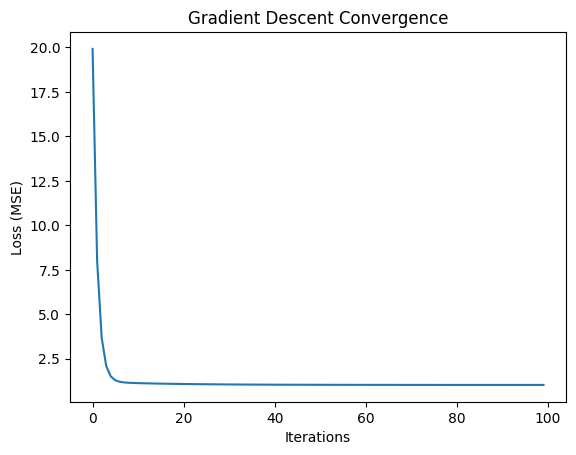

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (x0=1)
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent parameters
eta = 0.1  # Learning rate
n_iterations = 100
m = 100  # Number of samples

# Initialize random weights
theta = np.random.randn(2, 1)

# Store loss history
loss_history = []

# Perform gradient descent
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradient
    theta = theta - eta * gradients  # Update weights
    loss = (1 / m) * np.sum((X_b.dot(theta) - y) ** 2)  # Calculate MSE
    loss_history.append(loss)

# Results
print(f"Optimal parameters:\n{theta}")

# Plot convergence
plt.plot(range(n_iterations), loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

## 2. Multilayer Perceptron (MLP)

An MLP is a class of feedforward artificial neural networks with at least one hidden layer. Unlike simple perceptrons, MLPs can learn non-linear decision boundaries using activation functions (e.g., ReLU, sigmoid). Key features:

- Layers: Input → Hidden (≥1) → Output
- Backpropagation: Updates weights via chain rule
- Universal approximator: Can model complex functions
- Used for classification/regression tasks in domains like computer vision and tabular data analysis.

**Universal Approximation Theorem**: A 1-hidden-layer MLP with sufficient neurons can approximate any continuous function

The MLP consists of three or more layers (an input and an output layer with one or more hidden layers) of nonlinearly-activating nodes. Since MLPs are fully connected, each node in one layer connects with a certain weight.

![MLP](img/MLP.png)

Learning occurs in the perceptron by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result. This is an example of supervised learning, and is carried out through backpropagation, a generalization of the least mean squares algorithm in the linear perceptron.

Consider a simple MLP with one hidden layer of linear transformation $ y = wx + b $ and output layer just output values from that hidden layer. The data point is $ x = 1.5 $, $ y_{gt} = 0.8 $, the initial hyperparameters of hidden layers are $ w = [ 0.8 ] $ and $ b = 0.2 $.

![backpropagation](img/backpropagation.png)

Let our loss function $ L $ be squared error with coefficient 0.5, the initial loss is 0.18.

To optimise MLP we can adjust hyperparameters $ w $ and $ b $ in the reverse direction of partial derivative ($ ε $ is the learning rate, to ensure gradient descent convergent).

We can calculate partial derivative of loss function $ L $ over predicted value $ \hat{y} $ to simplify calculation of partial derivatives of $ L $ over each parameter, using chain rule.

In this step, we already witnessed backpropagation from output layer to hidden layer! It's basically about chain rule.

Then we calculate new values of hyperparameters and loss function (let learning rate $ ε $ to be 0.1):

Loss decreases from 0.18 to 0.082.

When we have more hidden layers, optimisation of each layer's parameters requires partial derivatives of loss function over next layer (closer to output layer).

![backpropagation](img/backpropagation2.png)

## 3. Pytorch

PyTorch is an open-source machine learning library for Python, widely used for deep learning applications. Developed by Facebook's AI Research team, it offers dynamic computation graphs (define-by-run), allowing flexible model building and debugging. Key features include automatic differentiation (autograd) for gradient calculation, extensive pre-trained models via libraries like TorchVision and TorchText, and strong community support. PyTorch is popular in both research and industry for tasks like natural language processing, computer vision, and reinforcement learning.

Let's import pytorch packages and try our first example. It's about fitting a cubic function with a MLP of single hidden layer.

In [9]:
# build up a neural network by hand, use the one hidden layer nn shown in the prev section
import torch
import torch.nn as nn
import torch.optim as optim

# target function
f = lambda x: 2 * x ** 3 - 3 * x ** 2 + 4 * x - 1


# define neural network
class CubicNet(nn.Module):
    def __init__(self, hidden_size=10):
        super(CubicNet, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # input -> hidden
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)  # hidden -> output

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# init MLP model
model = CubicNet(hidden_size=20)

Epoch [300/6000], Loss: 133262.4844
Epoch [600/6000], Loss: 96253.9375
Epoch [900/6000], Loss: 79432.0469
Epoch [1200/6000], Loss: 63765.9609
Epoch [1500/6000], Loss: 49961.9805
Epoch [1800/6000], Loss: 38485.7266
Epoch [2100/6000], Loss: 29093.2051
Epoch [2400/6000], Loss: 21567.6934
Epoch [2700/6000], Loss: 15836.6709
Epoch [3000/6000], Loss: 11657.8828
Epoch [3300/6000], Loss: 8563.7354
Epoch [3600/6000], Loss: 6268.7148
Epoch [3900/6000], Loss: 4588.5371
Epoch [4200/6000], Loss: 3301.2454
Epoch [4500/6000], Loss: 2374.6140
Epoch [4800/6000], Loss: 1725.7797
Epoch [5100/6000], Loss: 1277.4967
Epoch [5400/6000], Loss: 963.5631
Epoch [5700/6000], Loss: 738.6412
Epoch [6000/6000], Loss: 575.6268


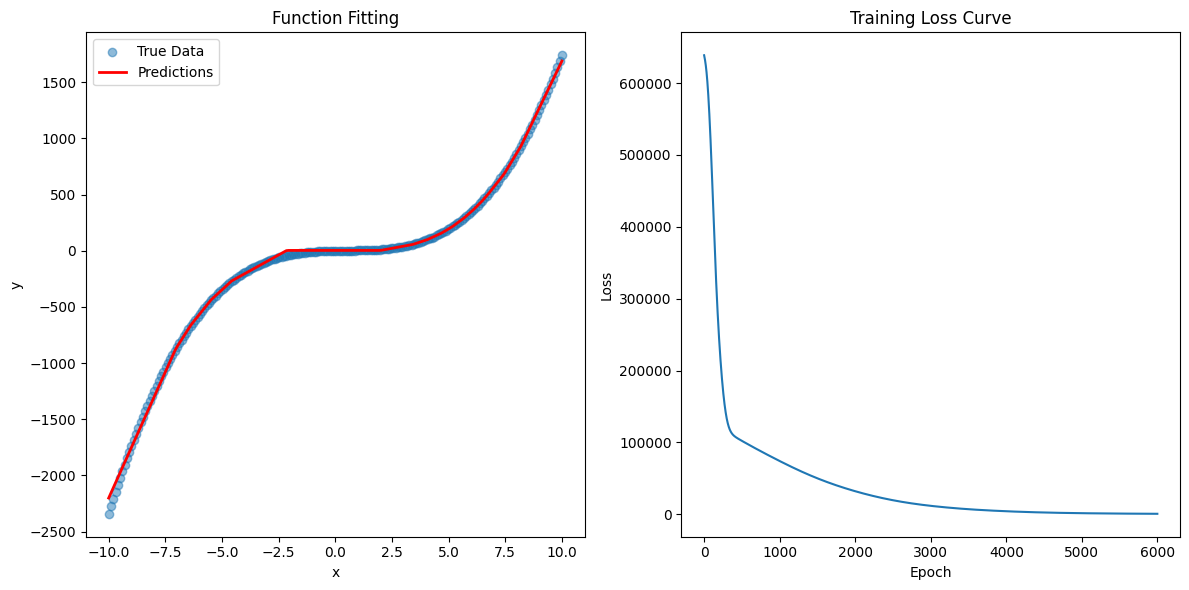

In [10]:
# generate data
x = torch.linspace(-10, 10, 200).unsqueeze(1)  # shape: (num_samples, 1)
y = f(x)
y += 0.1 * torch.randn_like(y)

# define loss function and optmiser
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# train
num_epochs = 6000
loss_history = []
for epoch in range(num_epochs):
    # forward propagation
    outputs = model(x)
    loss = criterion(outputs, y)
    # backward propagation and optimise
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # record learning curve
    loss_history.append(loss.item())
    if (epoch + 1) % 300 == 0: print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# visualisation
model.eval()
with torch.no_grad():
    predictions = model(x)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x.numpy(), y.numpy(), label='True Data', alpha=0.5)
plt.plot(x.numpy(), predictions.numpy(), 'r', lw=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.tight_layout()
plt.show()

In [11]:
# save model
torch.save(model.state_dict(), "model_weights.pth")

# load model
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()

CubicNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)

tensor(638.2468)


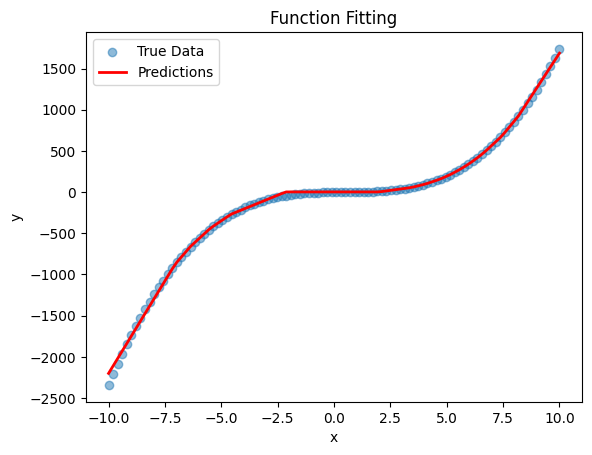

In [12]:
# test model on test set 1 
# test set 1 contains 100 datapoints in [-10,10]
x = torch.linspace(-10, 10, 100).unsqueeze(1)
y = f(x)
with torch.no_grad():
    y_pred = model(x)
    print(torch.mean((y_pred - y) ** 2))  # loss should be low (< 1000)
    
# plot fit curve on test set
plt.scatter(x.numpy(), y.numpy(), label='True Data', alpha=0.5)
plt.plot(x.numpy(), y_pred.numpy(), 'r', lw=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting')
plt.legend()
plt.show()

tensor(16519845.)


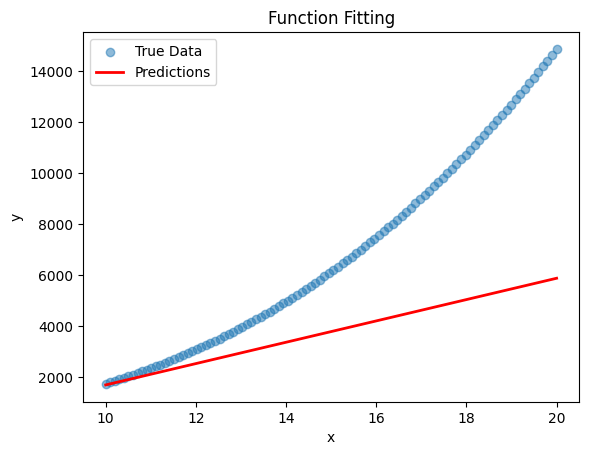

In [13]:
# test model on test set 2
# test set 2 contains 100 datapoints in [10,20]
x = torch.linspace(10, 20, 100).unsqueeze(1)
y = f(x)
with torch.no_grad():
    y_pred = model(x)
    print(torch.mean((y_pred - y) ** 2))  # loss should be extremely high (> 10**7)

# plot fit curve on test set
plt.scatter(x.numpy(), y.numpy(), label='True Data', alpha=0.5)
plt.plot(x.numpy(), y_pred.numpy(), 'r', lw=2, label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting')
plt.legend()
plt.show()

_Think: what causes the differences in accuracy on these 2 test sets?_
- nn doesn't work well on entirely strange data
- actually all machine learning methods are like this, because they learnt from training set, they can only know what they've learnt
- generalization ability (opposite to overfitting)

Exercise: can you define a MLP with 10 input neurons, 2 hidden layers, and a single output

Use your new defined MLP on the task above, then run the tests, what do you notice? what do you think cause the consequence?

In [14]:
# write your code

class NewCubicNet(nn.Module):
    def __init__(self, input_size=10, hidden1=64, hidden2=32, output_size=1):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden1)  # input -> hidden 1
        self.fc2 = nn.Linear(hidden1, hidden2)  # hidden 1 -> hidden 2
        self.fc3 = nn.Linear(hidden2, output_size)  # hidden 2 -> output
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = NewCubicNet(input_size=10)  # input dimensionality is 10

# generate data
x = torch.linspace(-10, 10, 100).unsqueeze(1)
y = f(x)

try:
    outputs = model(x)  # this raises error as actual input data is one-dimensional
except RuntimeError as e:
    print(e)

# solution 1: change input_size back to 1
# model = NewCubicNet(input_size=1)
# solution 2: expand input to 10D (feature engineering)
x = torch.cat([x ** i for i in range(10)], dim=1)
with torch.no_grad():
    y_pred = model(x)
    print(torch.mean((y_pred - y) ** 2))  # ummm, doesn't matter

mat1 and mat2 shapes cannot be multiplied (100x1 and 10x64)
tensor(3.2958e+13)


## 4. Convolutional Neural Networks (CNN)

Convolutional Neural Network (CNN) is a deep learning architecture specialized for processing grid-like data (e.g., images), is widely used in computer vision tasks like image recognition, object detection, and medical imaging. Its core components are:

- Convolutional Layers: Extract local features using learnable filters/kernels (e.g., edges, textures).
- Activation Functions (e.g., ReLU): Introduce non-linearity to capture complex patterns.
- Pooling Layers (e.g., MaxPooling): Reduce spatial dimensions while retaining key features.
- Fully Connected Layers: Combine high-level features for classification/regression.

Key Advantages:

- Hierarchical Feature Learning: Automatically learns low → high-level features (edges → shapes → objects).
- Parameter Sharing: Filters scan the entire input, reducing parameters vs. dense layers.
- Translation Invariance: Recognizes patterns regardless of position (via pooling).

Example Workflow (Image Classification):

Input → Conv → ReLU → Pool → Conv → ReLU → Pool → Flatten → FC → Output

Pooling layers are layers where neurons only has local views, instead of full connections to neurons of previous layers. This reduces number of connections and ease the pressure of overfitting. In max pooling layer, each neuron passes largest value of local views to next layer.

![convolutional layer](img/convolutional_layer.gif)

For max pooling layers, the backpropagation requires recording the maximum value position of each pooling window at the time of forward propagation, and the gradient is only passed to these locations, and the rest of the positions have a gradient of 0.

For example, we pass a matrix of size 2x2 to a max pooling layer with window size 2x2:

$$
    \text{input } x \rightarrow \text{pooling kernal } w \rightarrow \text{output } y
$$
$$
    \begin{bmatrix}
        1 & 2 \\
        3 & 4
    \end{bmatrix}
    \rightarrow \text{pooling window 2x2} \rightarrow
    \begin{bmatrix}
        0 & 0 \\
        0 & 4
    \end{bmatrix}
$$

For backpropagation let's assume the gradient of output given by next layer (closer to output layer) is 2:

$$
    \text{input } x \leftarrow \text{pooling kernal } w \leftarrow \text{output } y
$$
$$
    \frac {∂L}{∂x} =
        \begin{bmatrix}
            0 & 0 \\
            0 & 2
        \end{bmatrix}
    \leftarrow \text{pooling window 2x2} \leftarrow \frac {∂L}{∂y} = 2
$$

Convolutional layers are also layers where neurons only has local views. Each neuron does a full convolution with local view, which is multiplication between mapping cells in local view and convolution kernel (not matrix multiplication).

After passing through a convolutional layer, the image becomes abstracted to a feature map, also called an activation map.

For example, we pass a matrix of size 3x3 to a convolutional layer with window size 2x2:

$$
    \text{input } x \rightarrow \text{convolutional kernal } w \rightarrow \text{output } y
$$
$$
    \begin{bmatrix}
        1 & 1 & 1 \\
        0 & 0 & 1 \\
        0 & 0 & 1
    \end{bmatrix}
    \rightarrow
    \begin{bmatrix}
        0 & 1 \\
        0 & 1
    \end{bmatrix}
    \rightarrow
    \begin{bmatrix}
        1 & 2 \\
        0 & 2
    \end{bmatrix}
$$

For backpropagation, the gradient of convolutional kernal is the result of convolution between kernal and output gradient (output gradient is a random picked matrix):

$$
    \text{input } x \leftarrow \text{convolutional kernal } w \leftarrow \text{output } y
$$
$$
    \frac {∂L}{∂x} = w ⊛ \frac{∂L}{∂y} =
        \begin{bmatrix}
            0 & 2 \\
            0 & 2
        \end{bmatrix}
    \leftarrow
    \frac {∂L}{∂w} = x ⊛ \frac{∂L}{∂y} =
        \begin{bmatrix}
            3 & 5 \\
            0 & 4
        \end{bmatrix}
    \leftarrow
    \frac {∂L}{∂y} =
        \begin{bmatrix}
            1 & 0 \\
            0 & 1
        \end{bmatrix}
$$


## 5. MNIST dataset

The MNIST dataset (Modified National Institute of Standards and Technology database) is a widely used benchmark dataset in machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits from 0 to 9, divided into 60,000 training images and 10,000 test images.

Each image is 28x28 pixels in size, with pixel values ranging from 0 (black) to 255 (white). The dataset includes corresponding labels indicating the digit (0–9) represented in each image.

In [15]:
import torchvision
from torch.utils.data import DataLoader

# preprocessing
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,), (1,))
])

# load dataset
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# create data loader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
# define neural network
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))  # [B, 32, 28, 28]
        x = self.pool(x)  # [B, 32, 14, 14]
        x = self.relu(self.conv2(x))  # [B, 64, 14, 14]
        x = self.pool(x)  # [B, 64, 7, 7]
        x = x.view(-1, 64 * 7 * 7)  # flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# initialise model and running device
model = DigitClassifier()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DigitClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)

In [17]:
# define loss function and optimiser
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# training loop
num_epochs = 10
train_losses, test_accuracies = [], []
for epoch in range(num_epochs):

    # train
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # forward propagation
        outputs = model(images)
        loss = criterion(outputs, labels)
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # record loss
        running_loss += loss.item() * images.size(0)

    # average loss
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # test accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # average accuracy
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, "
          f"Test Accuracy: {accuracy:.2f}%")

Epoch [1/10], Train Loss: 0.2632, Test Accuracy: 98.20%
Epoch [2/10], Train Loss: 0.0933, Test Accuracy: 98.39%
Epoch [3/10], Train Loss: 0.0679, Test Accuracy: 99.00%
Epoch [4/10], Train Loss: 0.0549, Test Accuracy: 99.08%
Epoch [5/10], Train Loss: 0.0460, Test Accuracy: 99.19%
Epoch [6/10], Train Loss: 0.0410, Test Accuracy: 99.13%
Epoch [7/10], Train Loss: 0.0359, Test Accuracy: 99.14%
Epoch [8/10], Train Loss: 0.0315, Test Accuracy: 99.24%
Epoch [9/10], Train Loss: 0.0284, Test Accuracy: 99.19%
Epoch [10/10], Train Loss: 0.0258, Test Accuracy: 99.29%


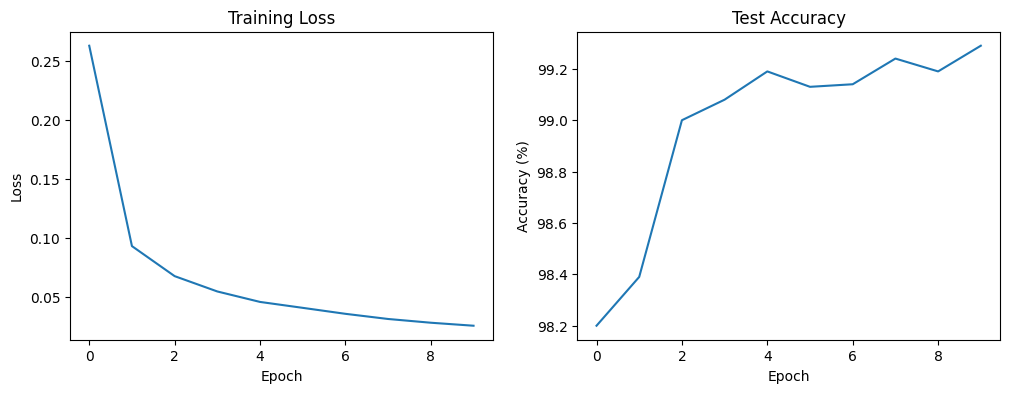

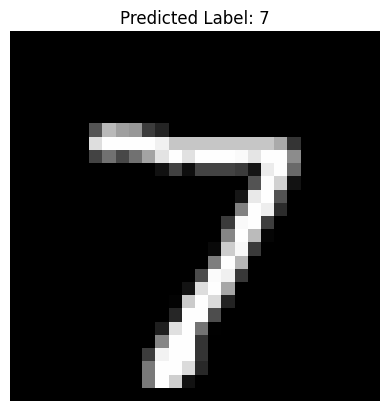

In [18]:
# visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Training Loss")
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.title("Test Accuracy")
plt.plot(test_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

# example prediction
with torch.no_grad():
    img = test_dataset.data[0]
    img_data = img.unsqueeze(0).float()
    prediction = torch.argmax(model(img_data), dim=1).item()
    plt.imshow(img, cmap="grey")
    plt.axis("off")
    plt.title(f"Predicted Label: {prediction}")
    plt.show()

# Wrap up and final words

- PCA: High-dimensional data leads to an increase in data sparsity, an exponential growth in computational complexity, and a decrease in the efficiency of traditional analytical methods.
- NN: Imitating the structure of human brain neurons, learning complex patterns through multiple layers of nonlinear transformations.
- MLP: The most basic neural network structure, consisting of an input layer, a hidden layer, and an output layer.
- CNN: Simulates the biological visual system and extracts local features through convolutional kernels (filters), with the same convolutional kernel slides across the whole image, reducing the number of parameters and improving computing efficiency.